0: "disco",
1: "metal",
2: "reggae",
3: "blues",
4: "rock",
5: "classical",
6: "jazz",
7: "hiphop",
8: "country",
9: "pop"

In [4]:
import os
import librosa
import math
import json 
import matplotlib.pyplot as plt
import numpy as np

pip install librosa

In [32]:
os.chdir('F:/musicamalytic')
dataset_path = r"./Data/genres_original"
json_path = r"data.json"
SAMPLE_RATE = 22050
#초당 샘플 갯수 = hz
DURATION = 30
# 30초
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

In [33]:
def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048,
             hop_length=512, num_segments=5):
    # Data storage dictionary
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": [],
    }
    samples_ps = int(SAMPLES_PER_TRACK/num_segments) # ps = per segment
    expected_vects_ps = math.ceil(samples_ps/hop_length)
    
    # loop through all the genres
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # enumerate 인덱스와 값을 출력
        # os.walk 경로와 상위폴더 이름, 파일이름 출력
        # ensuring not at root
        if dirpath is not dataset_path:
            # save the semantic label
            dirpath_comp = dirpath.split("/")
            semantic_label = dirpath_comp[-1]
            #상위폴더(분류시 컬럼)
            data["mapping"].append(semantic_label)
            print(f"Processing: {semantic_label}")
            
            # process files for specific genre
            for f in filenames:
                if(f==str("jazz.00054.wav")):
                    # As librosa only read files <1Mb
                    continue
                else:
                    # load audio file
                    file_path = os.path.join(dirpath, f)
                    signal,sr = librosa.load(file_path,sr=SAMPLE_RATE)
                    for s in range(num_segments):
                        start_sample = samples_ps * s
                        finish_sample = start_sample + samples_ps

                        mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
                                                    sr = sr,
                                                    n_fft = n_fft,
                                                    n_mfcc = n_mfcc,
                                                    hop_length = hop_length)

                        mfcc = mfcc.T

                        # store mfcc if it has expected length 
                        if len(mfcc)==expected_vects_ps:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print(f"{file_path}, segment: {s+1}")

    with open(json_path,"w") as f:
        json.dump(data,f,indent=4)

In [34]:
from IPython.display import clear_output

In [35]:
save_mfcc(dataset_path,json_path,num_segments=10)

Processing: genres_original\blues
./Data/genres_original\blues\blues.00000.wav, segment: 1
./Data/genres_original\blues\blues.00000.wav, segment: 2
./Data/genres_original\blues\blues.00000.wav, segment: 3
./Data/genres_original\blues\blues.00000.wav, segment: 4
./Data/genres_original\blues\blues.00000.wav, segment: 5
./Data/genres_original\blues\blues.00000.wav, segment: 6
./Data/genres_original\blues\blues.00000.wav, segment: 7
./Data/genres_original\blues\blues.00000.wav, segment: 8
./Data/genres_original\blues\blues.00000.wav, segment: 9
./Data/genres_original\blues\blues.00000.wav, segment: 10
./Data/genres_original\blues\blues.00001.wav, segment: 1
./Data/genres_original\blues\blues.00001.wav, segment: 2
./Data/genres_original\blues\blues.00001.wav, segment: 3
./Data/genres_original\blues\blues.00001.wav, segment: 4
./Data/genres_original\blues\blues.00001.wav, segment: 5
./Data/genres_original\blues\blues.00001.wav, segment: 6
./Data/genres_original\blues\blues.00001.wav, segment

./Data/genres_original\blues\blues.00015.wav, segment: 10
./Data/genres_original\blues\blues.00016.wav, segment: 1
./Data/genres_original\blues\blues.00016.wav, segment: 2
./Data/genres_original\blues\blues.00016.wav, segment: 3
./Data/genres_original\blues\blues.00016.wav, segment: 4
./Data/genres_original\blues\blues.00016.wav, segment: 5
./Data/genres_original\blues\blues.00016.wav, segment: 6
./Data/genres_original\blues\blues.00016.wav, segment: 7
./Data/genres_original\blues\blues.00016.wav, segment: 8
./Data/genres_original\blues\blues.00016.wav, segment: 9
./Data/genres_original\blues\blues.00016.wav, segment: 10
./Data/genres_original\blues\blues.00017.wav, segment: 1
./Data/genres_original\blues\blues.00017.wav, segment: 2
./Data/genres_original\blues\blues.00017.wav, segment: 3
./Data/genres_original\blues\blues.00017.wav, segment: 4
./Data/genres_original\blues\blues.00017.wav, segment: 5
./Data/genres_original\blues\blues.00017.wav, segment: 6
./Data/genres_original\blues\

./Data/genres_original\blues\blues.00030.wav, segment: 5
./Data/genres_original\blues\blues.00030.wav, segment: 6
./Data/genres_original\blues\blues.00030.wav, segment: 7
./Data/genres_original\blues\blues.00030.wav, segment: 8
./Data/genres_original\blues\blues.00030.wav, segment: 9
./Data/genres_original\blues\blues.00030.wav, segment: 10
./Data/genres_original\blues\blues.00031.wav, segment: 1
./Data/genres_original\blues\blues.00031.wav, segment: 2
./Data/genres_original\blues\blues.00031.wav, segment: 3
./Data/genres_original\blues\blues.00031.wav, segment: 4
./Data/genres_original\blues\blues.00031.wav, segment: 5
./Data/genres_original\blues\blues.00031.wav, segment: 6
./Data/genres_original\blues\blues.00031.wav, segment: 7
./Data/genres_original\blues\blues.00031.wav, segment: 8
./Data/genres_original\blues\blues.00031.wav, segment: 9
./Data/genres_original\blues\blues.00031.wav, segment: 10
./Data/genres_original\blues\blues.00032.wav, segment: 1
./Data/genres_original\blues\

./Data/genres_original\blues\blues.00045.wav, segment: 1
./Data/genres_original\blues\blues.00045.wav, segment: 2
./Data/genres_original\blues\blues.00045.wav, segment: 3
./Data/genres_original\blues\blues.00045.wav, segment: 4
./Data/genres_original\blues\blues.00045.wav, segment: 5
./Data/genres_original\blues\blues.00045.wav, segment: 6
./Data/genres_original\blues\blues.00045.wav, segment: 7
./Data/genres_original\blues\blues.00045.wav, segment: 8
./Data/genres_original\blues\blues.00045.wav, segment: 9
./Data/genres_original\blues\blues.00045.wav, segment: 10
./Data/genres_original\blues\blues.00046.wav, segment: 1
./Data/genres_original\blues\blues.00046.wav, segment: 2
./Data/genres_original\blues\blues.00046.wav, segment: 3
./Data/genres_original\blues\blues.00046.wav, segment: 4
./Data/genres_original\blues\blues.00046.wav, segment: 5
./Data/genres_original\blues\blues.00046.wav, segment: 6
./Data/genres_original\blues\blues.00046.wav, segment: 7
./Data/genres_original\blues\b

./Data/genres_original\blues\blues.00059.wav, segment: 5
./Data/genres_original\blues\blues.00059.wav, segment: 6
./Data/genres_original\blues\blues.00059.wav, segment: 7
./Data/genres_original\blues\blues.00059.wav, segment: 8
./Data/genres_original\blues\blues.00059.wav, segment: 9
./Data/genres_original\blues\blues.00059.wav, segment: 10
./Data/genres_original\blues\blues.00060.wav, segment: 1
./Data/genres_original\blues\blues.00060.wav, segment: 2
./Data/genres_original\blues\blues.00060.wav, segment: 3
./Data/genres_original\blues\blues.00060.wav, segment: 4
./Data/genres_original\blues\blues.00060.wav, segment: 5
./Data/genres_original\blues\blues.00060.wav, segment: 6
./Data/genres_original\blues\blues.00060.wav, segment: 7
./Data/genres_original\blues\blues.00060.wav, segment: 8
./Data/genres_original\blues\blues.00060.wav, segment: 9
./Data/genres_original\blues\blues.00060.wav, segment: 10
./Data/genres_original\blues\blues.00061.wav, segment: 1
./Data/genres_original\blues\

./Data/genres_original\blues\blues.00073.wav, segment: 10
./Data/genres_original\blues\blues.00074.wav, segment: 1
./Data/genres_original\blues\blues.00074.wav, segment: 2
./Data/genres_original\blues\blues.00074.wav, segment: 3
./Data/genres_original\blues\blues.00074.wav, segment: 4
./Data/genres_original\blues\blues.00074.wav, segment: 5
./Data/genres_original\blues\blues.00074.wav, segment: 6
./Data/genres_original\blues\blues.00074.wav, segment: 7
./Data/genres_original\blues\blues.00074.wav, segment: 8
./Data/genres_original\blues\blues.00074.wav, segment: 9
./Data/genres_original\blues\blues.00074.wav, segment: 10
./Data/genres_original\blues\blues.00075.wav, segment: 1
./Data/genres_original\blues\blues.00075.wav, segment: 2
./Data/genres_original\blues\blues.00075.wav, segment: 3
./Data/genres_original\blues\blues.00075.wav, segment: 4
./Data/genres_original\blues\blues.00075.wav, segment: 5
./Data/genres_original\blues\blues.00075.wav, segment: 6
./Data/genres_original\blues\

./Data/genres_original\blues\blues.00088.wav, segment: 10
./Data/genres_original\blues\blues.00089.wav, segment: 1
./Data/genres_original\blues\blues.00089.wav, segment: 2
./Data/genres_original\blues\blues.00089.wav, segment: 3
./Data/genres_original\blues\blues.00089.wav, segment: 4
./Data/genres_original\blues\blues.00089.wav, segment: 5
./Data/genres_original\blues\blues.00089.wav, segment: 6
./Data/genres_original\blues\blues.00089.wav, segment: 7
./Data/genres_original\blues\blues.00089.wav, segment: 8
./Data/genres_original\blues\blues.00089.wav, segment: 9
./Data/genres_original\blues\blues.00089.wav, segment: 10
./Data/genres_original\blues\blues.00090.wav, segment: 1
./Data/genres_original\blues\blues.00090.wav, segment: 2
./Data/genres_original\blues\blues.00090.wav, segment: 3
./Data/genres_original\blues\blues.00090.wav, segment: 4
./Data/genres_original\blues\blues.00090.wav, segment: 5
./Data/genres_original\blues\blues.00090.wav, segment: 6
./Data/genres_original\blues\

./Data/genres_original\classical\classical.00003.wav, segment: 2
./Data/genres_original\classical\classical.00003.wav, segment: 3
./Data/genres_original\classical\classical.00003.wav, segment: 4
./Data/genres_original\classical\classical.00003.wav, segment: 5
./Data/genres_original\classical\classical.00003.wav, segment: 6
./Data/genres_original\classical\classical.00003.wav, segment: 7
./Data/genres_original\classical\classical.00003.wav, segment: 8
./Data/genres_original\classical\classical.00003.wav, segment: 9
./Data/genres_original\classical\classical.00003.wav, segment: 10
./Data/genres_original\classical\classical.00004.wav, segment: 1
./Data/genres_original\classical\classical.00004.wav, segment: 2
./Data/genres_original\classical\classical.00004.wav, segment: 3
./Data/genres_original\classical\classical.00004.wav, segment: 4
./Data/genres_original\classical\classical.00004.wav, segment: 5
./Data/genres_original\classical\classical.00004.wav, segment: 6
./Data/genres_original\c

./Data/genres_original\classical\classical.00016.wav, segment: 1
./Data/genres_original\classical\classical.00016.wav, segment: 2
./Data/genres_original\classical\classical.00016.wav, segment: 3
./Data/genres_original\classical\classical.00016.wav, segment: 4
./Data/genres_original\classical\classical.00016.wav, segment: 5
./Data/genres_original\classical\classical.00016.wav, segment: 6
./Data/genres_original\classical\classical.00016.wav, segment: 7
./Data/genres_original\classical\classical.00016.wav, segment: 8
./Data/genres_original\classical\classical.00016.wav, segment: 9
./Data/genres_original\classical\classical.00016.wav, segment: 10
./Data/genres_original\classical\classical.00017.wav, segment: 1
./Data/genres_original\classical\classical.00017.wav, segment: 2
./Data/genres_original\classical\classical.00017.wav, segment: 3
./Data/genres_original\classical\classical.00017.wav, segment: 4
./Data/genres_original\classical\classical.00017.wav, segment: 5
./Data/genres_original\c

./Data/genres_original\classical\classical.00030.wav, segment: 2
./Data/genres_original\classical\classical.00030.wav, segment: 3
./Data/genres_original\classical\classical.00030.wav, segment: 4
./Data/genres_original\classical\classical.00030.wav, segment: 5
./Data/genres_original\classical\classical.00030.wav, segment: 6
./Data/genres_original\classical\classical.00030.wav, segment: 7
./Data/genres_original\classical\classical.00030.wav, segment: 8
./Data/genres_original\classical\classical.00030.wav, segment: 9
./Data/genres_original\classical\classical.00030.wav, segment: 10
./Data/genres_original\classical\classical.00031.wav, segment: 1
./Data/genres_original\classical\classical.00031.wav, segment: 2
./Data/genres_original\classical\classical.00031.wav, segment: 3
./Data/genres_original\classical\classical.00031.wav, segment: 4
./Data/genres_original\classical\classical.00031.wav, segment: 5
./Data/genres_original\classical\classical.00031.wav, segment: 6
./Data/genres_original\c

./Data/genres_original\classical\classical.00043.wav, segment: 2
./Data/genres_original\classical\classical.00043.wav, segment: 3
./Data/genres_original\classical\classical.00043.wav, segment: 4
./Data/genres_original\classical\classical.00043.wav, segment: 5
./Data/genres_original\classical\classical.00043.wav, segment: 6
./Data/genres_original\classical\classical.00043.wav, segment: 7
./Data/genres_original\classical\classical.00043.wav, segment: 8
./Data/genres_original\classical\classical.00043.wav, segment: 9
./Data/genres_original\classical\classical.00043.wav, segment: 10
./Data/genres_original\classical\classical.00044.wav, segment: 1
./Data/genres_original\classical\classical.00044.wav, segment: 2
./Data/genres_original\classical\classical.00044.wav, segment: 3
./Data/genres_original\classical\classical.00044.wav, segment: 4
./Data/genres_original\classical\classical.00044.wav, segment: 5
./Data/genres_original\classical\classical.00044.wav, segment: 6
./Data/genres_original\c

./Data/genres_original\classical\classical.00056.wav, segment: 2
./Data/genres_original\classical\classical.00056.wav, segment: 3
./Data/genres_original\classical\classical.00056.wav, segment: 4
./Data/genres_original\classical\classical.00056.wav, segment: 5
./Data/genres_original\classical\classical.00056.wav, segment: 6
./Data/genres_original\classical\classical.00056.wav, segment: 7
./Data/genres_original\classical\classical.00056.wav, segment: 8
./Data/genres_original\classical\classical.00056.wav, segment: 9
./Data/genres_original\classical\classical.00056.wav, segment: 10
./Data/genres_original\classical\classical.00057.wav, segment: 1
./Data/genres_original\classical\classical.00057.wav, segment: 2
./Data/genres_original\classical\classical.00057.wav, segment: 3
./Data/genres_original\classical\classical.00057.wav, segment: 4
./Data/genres_original\classical\classical.00057.wav, segment: 5
./Data/genres_original\classical\classical.00057.wav, segment: 6
./Data/genres_original\c

./Data/genres_original\classical\classical.00070.wav, segment: 2
./Data/genres_original\classical\classical.00070.wav, segment: 3
./Data/genres_original\classical\classical.00070.wav, segment: 4
./Data/genres_original\classical\classical.00070.wav, segment: 5
./Data/genres_original\classical\classical.00070.wav, segment: 6
./Data/genres_original\classical\classical.00070.wav, segment: 7
./Data/genres_original\classical\classical.00070.wav, segment: 8
./Data/genres_original\classical\classical.00070.wav, segment: 9
./Data/genres_original\classical\classical.00070.wav, segment: 10
./Data/genres_original\classical\classical.00071.wav, segment: 1
./Data/genres_original\classical\classical.00071.wav, segment: 2
./Data/genres_original\classical\classical.00071.wav, segment: 3
./Data/genres_original\classical\classical.00071.wav, segment: 4
./Data/genres_original\classical\classical.00071.wav, segment: 5
./Data/genres_original\classical\classical.00071.wav, segment: 6
./Data/genres_original\c

./Data/genres_original\classical\classical.00084.wav, segment: 1
./Data/genres_original\classical\classical.00084.wav, segment: 2
./Data/genres_original\classical\classical.00084.wav, segment: 3
./Data/genres_original\classical\classical.00084.wav, segment: 4
./Data/genres_original\classical\classical.00084.wav, segment: 5
./Data/genres_original\classical\classical.00084.wav, segment: 6
./Data/genres_original\classical\classical.00084.wav, segment: 7
./Data/genres_original\classical\classical.00084.wav, segment: 8
./Data/genres_original\classical\classical.00084.wav, segment: 9
./Data/genres_original\classical\classical.00084.wav, segment: 10
./Data/genres_original\classical\classical.00085.wav, segment: 1
./Data/genres_original\classical\classical.00085.wav, segment: 2
./Data/genres_original\classical\classical.00085.wav, segment: 3
./Data/genres_original\classical\classical.00085.wav, segment: 4
./Data/genres_original\classical\classical.00085.wav, segment: 5
./Data/genres_original\c

./Data/genres_original\classical\classical.00097.wav, segment: 6
./Data/genres_original\classical\classical.00097.wav, segment: 7
./Data/genres_original\classical\classical.00097.wav, segment: 8
./Data/genres_original\classical\classical.00097.wav, segment: 9
./Data/genres_original\classical\classical.00097.wav, segment: 10
./Data/genres_original\classical\classical.00098.wav, segment: 1
./Data/genres_original\classical\classical.00098.wav, segment: 2
./Data/genres_original\classical\classical.00098.wav, segment: 3
./Data/genres_original\classical\classical.00098.wav, segment: 4
./Data/genres_original\classical\classical.00098.wav, segment: 5
./Data/genres_original\classical\classical.00098.wav, segment: 6
./Data/genres_original\classical\classical.00098.wav, segment: 7
./Data/genres_original\classical\classical.00098.wav, segment: 8
./Data/genres_original\classical\classical.00098.wav, segment: 9
./Data/genres_original\classical\classical.00098.wav, segment: 10
./Data/genres_original\

./Data/genres_original\country\country.00012.wav, segment: 2
./Data/genres_original\country\country.00012.wav, segment: 3
./Data/genres_original\country\country.00012.wav, segment: 4
./Data/genres_original\country\country.00012.wav, segment: 5
./Data/genres_original\country\country.00012.wav, segment: 6
./Data/genres_original\country\country.00012.wav, segment: 7
./Data/genres_original\country\country.00012.wav, segment: 8
./Data/genres_original\country\country.00012.wav, segment: 9
./Data/genres_original\country\country.00012.wav, segment: 10
./Data/genres_original\country\country.00013.wav, segment: 1
./Data/genres_original\country\country.00013.wav, segment: 2
./Data/genres_original\country\country.00013.wav, segment: 3
./Data/genres_original\country\country.00013.wav, segment: 4
./Data/genres_original\country\country.00013.wav, segment: 5
./Data/genres_original\country\country.00013.wav, segment: 6
./Data/genres_original\country\country.00013.wav, segment: 7
./Data/genres_original\

./Data/genres_original\country\country.00026.wav, segment: 7
./Data/genres_original\country\country.00026.wav, segment: 8
./Data/genres_original\country\country.00026.wav, segment: 9
./Data/genres_original\country\country.00026.wav, segment: 10
./Data/genres_original\country\country.00027.wav, segment: 1
./Data/genres_original\country\country.00027.wav, segment: 2
./Data/genres_original\country\country.00027.wav, segment: 3
./Data/genres_original\country\country.00027.wav, segment: 4
./Data/genres_original\country\country.00027.wav, segment: 5
./Data/genres_original\country\country.00027.wav, segment: 6
./Data/genres_original\country\country.00027.wav, segment: 7
./Data/genres_original\country\country.00027.wav, segment: 8
./Data/genres_original\country\country.00027.wav, segment: 9
./Data/genres_original\country\country.00027.wav, segment: 10
./Data/genres_original\country\country.00028.wav, segment: 1
./Data/genres_original\country\country.00028.wav, segment: 2
./Data/genres_original

./Data/genres_original\country\country.00040.wav, segment: 1
./Data/genres_original\country\country.00040.wav, segment: 2
./Data/genres_original\country\country.00040.wav, segment: 3
./Data/genres_original\country\country.00040.wav, segment: 4
./Data/genres_original\country\country.00040.wav, segment: 5
./Data/genres_original\country\country.00040.wav, segment: 6
./Data/genres_original\country\country.00040.wav, segment: 7
./Data/genres_original\country\country.00040.wav, segment: 8
./Data/genres_original\country\country.00040.wav, segment: 9
./Data/genres_original\country\country.00040.wav, segment: 10
./Data/genres_original\country\country.00041.wav, segment: 1
./Data/genres_original\country\country.00041.wav, segment: 2
./Data/genres_original\country\country.00041.wav, segment: 3
./Data/genres_original\country\country.00041.wav, segment: 4
./Data/genres_original\country\country.00041.wav, segment: 5
./Data/genres_original\country\country.00041.wav, segment: 6
./Data/genres_original\

./Data/genres_original\country\country.00054.wav, segment: 1
./Data/genres_original\country\country.00054.wav, segment: 2
./Data/genres_original\country\country.00054.wav, segment: 3
./Data/genres_original\country\country.00054.wav, segment: 4
./Data/genres_original\country\country.00054.wav, segment: 5
./Data/genres_original\country\country.00054.wav, segment: 6
./Data/genres_original\country\country.00054.wav, segment: 7
./Data/genres_original\country\country.00054.wav, segment: 8
./Data/genres_original\country\country.00054.wav, segment: 9
./Data/genres_original\country\country.00054.wav, segment: 10
./Data/genres_original\country\country.00055.wav, segment: 1
./Data/genres_original\country\country.00055.wav, segment: 2
./Data/genres_original\country\country.00055.wav, segment: 3
./Data/genres_original\country\country.00055.wav, segment: 4
./Data/genres_original\country\country.00055.wav, segment: 5
./Data/genres_original\country\country.00055.wav, segment: 6
./Data/genres_original\

./Data/genres_original\country\country.00067.wav, segment: 9
./Data/genres_original\country\country.00067.wav, segment: 10
./Data/genres_original\country\country.00068.wav, segment: 1
./Data/genres_original\country\country.00068.wav, segment: 2
./Data/genres_original\country\country.00068.wav, segment: 3
./Data/genres_original\country\country.00068.wav, segment: 4
./Data/genres_original\country\country.00068.wav, segment: 5
./Data/genres_original\country\country.00068.wav, segment: 6
./Data/genres_original\country\country.00068.wav, segment: 7
./Data/genres_original\country\country.00068.wav, segment: 8
./Data/genres_original\country\country.00068.wav, segment: 9
./Data/genres_original\country\country.00068.wav, segment: 10
./Data/genres_original\country\country.00069.wav, segment: 1
./Data/genres_original\country\country.00069.wav, segment: 2
./Data/genres_original\country\country.00069.wav, segment: 3
./Data/genres_original\country\country.00069.wav, segment: 4
./Data/genres_original

./Data/genres_original\country\country.00081.wav, segment: 6
./Data/genres_original\country\country.00081.wav, segment: 7
./Data/genres_original\country\country.00081.wav, segment: 8
./Data/genres_original\country\country.00081.wav, segment: 9
./Data/genres_original\country\country.00081.wav, segment: 10
./Data/genres_original\country\country.00082.wav, segment: 1
./Data/genres_original\country\country.00082.wav, segment: 2
./Data/genres_original\country\country.00082.wav, segment: 3
./Data/genres_original\country\country.00082.wav, segment: 4
./Data/genres_original\country\country.00082.wav, segment: 5
./Data/genres_original\country\country.00082.wav, segment: 6
./Data/genres_original\country\country.00082.wav, segment: 7
./Data/genres_original\country\country.00082.wav, segment: 8
./Data/genres_original\country\country.00082.wav, segment: 9
./Data/genres_original\country\country.00082.wav, segment: 10
./Data/genres_original\country\country.00083.wav, segment: 1
./Data/genres_original

./Data/genres_original\country\country.00096.wav, segment: 8
./Data/genres_original\country\country.00096.wav, segment: 9
./Data/genres_original\country\country.00096.wav, segment: 10
./Data/genres_original\country\country.00097.wav, segment: 1
./Data/genres_original\country\country.00097.wav, segment: 2
./Data/genres_original\country\country.00097.wav, segment: 3
./Data/genres_original\country\country.00097.wav, segment: 4
./Data/genres_original\country\country.00097.wav, segment: 5
./Data/genres_original\country\country.00097.wav, segment: 6
./Data/genres_original\country\country.00097.wav, segment: 7
./Data/genres_original\country\country.00097.wav, segment: 8
./Data/genres_original\country\country.00097.wav, segment: 9
./Data/genres_original\country\country.00097.wav, segment: 10
./Data/genres_original\country\country.00098.wav, segment: 1
./Data/genres_original\country\country.00098.wav, segment: 2
./Data/genres_original\country\country.00098.wav, segment: 3
./Data/genres_original

./Data/genres_original\disco\disco.00012.wav, segment: 4
./Data/genres_original\disco\disco.00012.wav, segment: 5
./Data/genres_original\disco\disco.00012.wav, segment: 6
./Data/genres_original\disco\disco.00012.wav, segment: 7
./Data/genres_original\disco\disco.00012.wav, segment: 8
./Data/genres_original\disco\disco.00012.wav, segment: 9
./Data/genres_original\disco\disco.00012.wav, segment: 10
./Data/genres_original\disco\disco.00013.wav, segment: 1
./Data/genres_original\disco\disco.00013.wav, segment: 2
./Data/genres_original\disco\disco.00013.wav, segment: 3
./Data/genres_original\disco\disco.00013.wav, segment: 4
./Data/genres_original\disco\disco.00013.wav, segment: 5
./Data/genres_original\disco\disco.00013.wav, segment: 6
./Data/genres_original\disco\disco.00013.wav, segment: 7
./Data/genres_original\disco\disco.00013.wav, segment: 8
./Data/genres_original\disco\disco.00013.wav, segment: 9
./Data/genres_original\disco\disco.00013.wav, segment: 10
./Data/genres_original\disco\

./Data/genres_original\disco\disco.00028.wav, segment: 1
./Data/genres_original\disco\disco.00028.wav, segment: 2
./Data/genres_original\disco\disco.00028.wav, segment: 3
./Data/genres_original\disco\disco.00028.wav, segment: 4
./Data/genres_original\disco\disco.00028.wav, segment: 5
./Data/genres_original\disco\disco.00028.wav, segment: 6
./Data/genres_original\disco\disco.00028.wav, segment: 7
./Data/genres_original\disco\disco.00028.wav, segment: 8
./Data/genres_original\disco\disco.00028.wav, segment: 9
./Data/genres_original\disco\disco.00028.wav, segment: 10
./Data/genres_original\disco\disco.00029.wav, segment: 1
./Data/genres_original\disco\disco.00029.wav, segment: 2
./Data/genres_original\disco\disco.00029.wav, segment: 3
./Data/genres_original\disco\disco.00029.wav, segment: 4
./Data/genres_original\disco\disco.00029.wav, segment: 5
./Data/genres_original\disco\disco.00029.wav, segment: 6
./Data/genres_original\disco\disco.00029.wav, segment: 7
./Data/genres_original\disco\d

./Data/genres_original\disco\disco.00044.wav, segment: 2
./Data/genres_original\disco\disco.00044.wav, segment: 3
./Data/genres_original\disco\disco.00044.wav, segment: 4
./Data/genres_original\disco\disco.00044.wav, segment: 5
./Data/genres_original\disco\disco.00044.wav, segment: 6
./Data/genres_original\disco\disco.00044.wav, segment: 7
./Data/genres_original\disco\disco.00044.wav, segment: 8
./Data/genres_original\disco\disco.00044.wav, segment: 9
./Data/genres_original\disco\disco.00044.wav, segment: 10
./Data/genres_original\disco\disco.00045.wav, segment: 1
./Data/genres_original\disco\disco.00045.wav, segment: 2
./Data/genres_original\disco\disco.00045.wav, segment: 3
./Data/genres_original\disco\disco.00045.wav, segment: 4
./Data/genres_original\disco\disco.00045.wav, segment: 5
./Data/genres_original\disco\disco.00045.wav, segment: 6
./Data/genres_original\disco\disco.00045.wav, segment: 7
./Data/genres_original\disco\disco.00045.wav, segment: 8
./Data/genres_original\disco\d

./Data/genres_original\disco\disco.00059.wav, segment: 7
./Data/genres_original\disco\disco.00059.wav, segment: 8
./Data/genres_original\disco\disco.00059.wav, segment: 9
./Data/genres_original\disco\disco.00059.wav, segment: 10
./Data/genres_original\disco\disco.00060.wav, segment: 1
./Data/genres_original\disco\disco.00060.wav, segment: 2
./Data/genres_original\disco\disco.00060.wav, segment: 3
./Data/genres_original\disco\disco.00060.wav, segment: 4
./Data/genres_original\disco\disco.00060.wav, segment: 5
./Data/genres_original\disco\disco.00060.wav, segment: 6
./Data/genres_original\disco\disco.00060.wav, segment: 7
./Data/genres_original\disco\disco.00060.wav, segment: 8
./Data/genres_original\disco\disco.00060.wav, segment: 9
./Data/genres_original\disco\disco.00060.wav, segment: 10
./Data/genres_original\disco\disco.00061.wav, segment: 1
./Data/genres_original\disco\disco.00061.wav, segment: 2
./Data/genres_original\disco\disco.00061.wav, segment: 3
./Data/genres_original\disco\

./Data/genres_original\disco\disco.00074.wav, segment: 10
./Data/genres_original\disco\disco.00075.wav, segment: 1
./Data/genres_original\disco\disco.00075.wav, segment: 2
./Data/genres_original\disco\disco.00075.wav, segment: 3
./Data/genres_original\disco\disco.00075.wav, segment: 4
./Data/genres_original\disco\disco.00075.wav, segment: 5
./Data/genres_original\disco\disco.00075.wav, segment: 6
./Data/genres_original\disco\disco.00075.wav, segment: 7
./Data/genres_original\disco\disco.00075.wav, segment: 8
./Data/genres_original\disco\disco.00075.wav, segment: 9
./Data/genres_original\disco\disco.00075.wav, segment: 10
./Data/genres_original\disco\disco.00076.wav, segment: 1
./Data/genres_original\disco\disco.00076.wav, segment: 2
./Data/genres_original\disco\disco.00076.wav, segment: 3
./Data/genres_original\disco\disco.00076.wav, segment: 4
./Data/genres_original\disco\disco.00076.wav, segment: 5
./Data/genres_original\disco\disco.00076.wav, segment: 6
./Data/genres_original\disco\

./Data/genres_original\disco\disco.00090.wav, segment: 2
./Data/genres_original\disco\disco.00090.wav, segment: 3
./Data/genres_original\disco\disco.00090.wav, segment: 4
./Data/genres_original\disco\disco.00090.wav, segment: 5
./Data/genres_original\disco\disco.00090.wav, segment: 6
./Data/genres_original\disco\disco.00090.wav, segment: 7
./Data/genres_original\disco\disco.00090.wav, segment: 8
./Data/genres_original\disco\disco.00090.wav, segment: 9
./Data/genres_original\disco\disco.00090.wav, segment: 10
./Data/genres_original\disco\disco.00091.wav, segment: 1
./Data/genres_original\disco\disco.00091.wav, segment: 2
./Data/genres_original\disco\disco.00091.wav, segment: 3
./Data/genres_original\disco\disco.00091.wav, segment: 4
./Data/genres_original\disco\disco.00091.wav, segment: 5
./Data/genres_original\disco\disco.00091.wav, segment: 6
./Data/genres_original\disco\disco.00091.wav, segment: 7
./Data/genres_original\disco\disco.00091.wav, segment: 8
./Data/genres_original\disco\d

./Data/genres_original\hiphop\hiphop.00005.wav, segment: 8
./Data/genres_original\hiphop\hiphop.00005.wav, segment: 9
./Data/genres_original\hiphop\hiphop.00005.wav, segment: 10
./Data/genres_original\hiphop\hiphop.00006.wav, segment: 1
./Data/genres_original\hiphop\hiphop.00006.wav, segment: 2
./Data/genres_original\hiphop\hiphop.00006.wav, segment: 3
./Data/genres_original\hiphop\hiphop.00006.wav, segment: 4
./Data/genres_original\hiphop\hiphop.00006.wav, segment: 5
./Data/genres_original\hiphop\hiphop.00006.wav, segment: 6
./Data/genres_original\hiphop\hiphop.00006.wav, segment: 7
./Data/genres_original\hiphop\hiphop.00006.wav, segment: 8
./Data/genres_original\hiphop\hiphop.00006.wav, segment: 9
./Data/genres_original\hiphop\hiphop.00006.wav, segment: 10
./Data/genres_original\hiphop\hiphop.00007.wav, segment: 1
./Data/genres_original\hiphop\hiphop.00007.wav, segment: 2
./Data/genres_original\hiphop\hiphop.00007.wav, segment: 3
./Data/genres_original\hiphop\hiphop.00007.wav, segmen

./Data/genres_original\hiphop\hiphop.00020.wav, segment: 4
./Data/genres_original\hiphop\hiphop.00020.wav, segment: 5
./Data/genres_original\hiphop\hiphop.00020.wav, segment: 6
./Data/genres_original\hiphop\hiphop.00020.wav, segment: 7
./Data/genres_original\hiphop\hiphop.00020.wav, segment: 8
./Data/genres_original\hiphop\hiphop.00020.wav, segment: 9
./Data/genres_original\hiphop\hiphop.00020.wav, segment: 10
./Data/genres_original\hiphop\hiphop.00021.wav, segment: 1
./Data/genres_original\hiphop\hiphop.00021.wav, segment: 2
./Data/genres_original\hiphop\hiphop.00021.wav, segment: 3
./Data/genres_original\hiphop\hiphop.00021.wav, segment: 4
./Data/genres_original\hiphop\hiphop.00021.wav, segment: 5
./Data/genres_original\hiphop\hiphop.00021.wav, segment: 6
./Data/genres_original\hiphop\hiphop.00021.wav, segment: 7
./Data/genres_original\hiphop\hiphop.00021.wav, segment: 8
./Data/genres_original\hiphop\hiphop.00021.wav, segment: 9
./Data/genres_original\hiphop\hiphop.00021.wav, segment

./Data/genres_original\hiphop\hiphop.00035.wav, segment: 8
./Data/genres_original\hiphop\hiphop.00035.wav, segment: 9
./Data/genres_original\hiphop\hiphop.00035.wav, segment: 10
./Data/genres_original\hiphop\hiphop.00036.wav, segment: 1
./Data/genres_original\hiphop\hiphop.00036.wav, segment: 2
./Data/genres_original\hiphop\hiphop.00036.wav, segment: 3
./Data/genres_original\hiphop\hiphop.00036.wav, segment: 4
./Data/genres_original\hiphop\hiphop.00036.wav, segment: 5
./Data/genres_original\hiphop\hiphop.00036.wav, segment: 6
./Data/genres_original\hiphop\hiphop.00036.wav, segment: 7
./Data/genres_original\hiphop\hiphop.00036.wav, segment: 8
./Data/genres_original\hiphop\hiphop.00036.wav, segment: 9
./Data/genres_original\hiphop\hiphop.00036.wav, segment: 10
./Data/genres_original\hiphop\hiphop.00037.wav, segment: 1
./Data/genres_original\hiphop\hiphop.00037.wav, segment: 2
./Data/genres_original\hiphop\hiphop.00037.wav, segment: 3
./Data/genres_original\hiphop\hiphop.00037.wav, segmen

./Data/genres_original\hiphop\hiphop.00050.wav, segment: 2
./Data/genres_original\hiphop\hiphop.00050.wav, segment: 3
./Data/genres_original\hiphop\hiphop.00050.wav, segment: 4
./Data/genres_original\hiphop\hiphop.00050.wav, segment: 5
./Data/genres_original\hiphop\hiphop.00050.wav, segment: 6
./Data/genres_original\hiphop\hiphop.00050.wav, segment: 7
./Data/genres_original\hiphop\hiphop.00050.wav, segment: 8
./Data/genres_original\hiphop\hiphop.00050.wav, segment: 9
./Data/genres_original\hiphop\hiphop.00050.wav, segment: 10
./Data/genres_original\hiphop\hiphop.00051.wav, segment: 1
./Data/genres_original\hiphop\hiphop.00051.wav, segment: 2
./Data/genres_original\hiphop\hiphop.00051.wav, segment: 3
./Data/genres_original\hiphop\hiphop.00051.wav, segment: 4
./Data/genres_original\hiphop\hiphop.00051.wav, segment: 5
./Data/genres_original\hiphop\hiphop.00051.wav, segment: 6
./Data/genres_original\hiphop\hiphop.00051.wav, segment: 7
./Data/genres_original\hiphop\hiphop.00051.wav, segment

./Data/genres_original\hiphop\hiphop.00064.wav, segment: 1
./Data/genres_original\hiphop\hiphop.00064.wav, segment: 2
./Data/genres_original\hiphop\hiphop.00064.wav, segment: 3
./Data/genres_original\hiphop\hiphop.00064.wav, segment: 4
./Data/genres_original\hiphop\hiphop.00064.wav, segment: 5
./Data/genres_original\hiphop\hiphop.00064.wav, segment: 6
./Data/genres_original\hiphop\hiphop.00064.wav, segment: 7
./Data/genres_original\hiphop\hiphop.00064.wav, segment: 8
./Data/genres_original\hiphop\hiphop.00064.wav, segment: 9
./Data/genres_original\hiphop\hiphop.00064.wav, segment: 10
./Data/genres_original\hiphop\hiphop.00065.wav, segment: 1
./Data/genres_original\hiphop\hiphop.00065.wav, segment: 2
./Data/genres_original\hiphop\hiphop.00065.wav, segment: 3
./Data/genres_original\hiphop\hiphop.00065.wav, segment: 4
./Data/genres_original\hiphop\hiphop.00065.wav, segment: 5
./Data/genres_original\hiphop\hiphop.00065.wav, segment: 6
./Data/genres_original\hiphop\hiphop.00065.wav, segment

./Data/genres_original\hiphop\hiphop.00079.wav, segment: 1
./Data/genres_original\hiphop\hiphop.00079.wav, segment: 2
./Data/genres_original\hiphop\hiphop.00079.wav, segment: 3
./Data/genres_original\hiphop\hiphop.00079.wav, segment: 4
./Data/genres_original\hiphop\hiphop.00079.wav, segment: 5
./Data/genres_original\hiphop\hiphop.00079.wav, segment: 6
./Data/genres_original\hiphop\hiphop.00079.wav, segment: 7
./Data/genres_original\hiphop\hiphop.00079.wav, segment: 8
./Data/genres_original\hiphop\hiphop.00079.wav, segment: 9
./Data/genres_original\hiphop\hiphop.00079.wav, segment: 10
./Data/genres_original\hiphop\hiphop.00080.wav, segment: 1
./Data/genres_original\hiphop\hiphop.00080.wav, segment: 2
./Data/genres_original\hiphop\hiphop.00080.wav, segment: 3
./Data/genres_original\hiphop\hiphop.00080.wav, segment: 4
./Data/genres_original\hiphop\hiphop.00080.wav, segment: 5
./Data/genres_original\hiphop\hiphop.00080.wav, segment: 6
./Data/genres_original\hiphop\hiphop.00080.wav, segment

./Data/genres_original\hiphop\hiphop.00094.wav, segment: 3
./Data/genres_original\hiphop\hiphop.00094.wav, segment: 4
./Data/genres_original\hiphop\hiphop.00094.wav, segment: 5
./Data/genres_original\hiphop\hiphop.00094.wav, segment: 6
./Data/genres_original\hiphop\hiphop.00094.wav, segment: 7
./Data/genres_original\hiphop\hiphop.00094.wav, segment: 8
./Data/genres_original\hiphop\hiphop.00094.wav, segment: 9
./Data/genres_original\hiphop\hiphop.00094.wav, segment: 10
./Data/genres_original\hiphop\hiphop.00095.wav, segment: 1
./Data/genres_original\hiphop\hiphop.00095.wav, segment: 2
./Data/genres_original\hiphop\hiphop.00095.wav, segment: 3
./Data/genres_original\hiphop\hiphop.00095.wav, segment: 4
./Data/genres_original\hiphop\hiphop.00095.wav, segment: 5
./Data/genres_original\hiphop\hiphop.00095.wav, segment: 6
./Data/genres_original\hiphop\hiphop.00095.wav, segment: 7
./Data/genres_original\hiphop\hiphop.00095.wav, segment: 8
./Data/genres_original\hiphop\hiphop.00095.wav, segment

./Data/genres_original\jazz\jazz.00009.wav, segment: 6
./Data/genres_original\jazz\jazz.00009.wav, segment: 7
./Data/genres_original\jazz\jazz.00009.wav, segment: 8
./Data/genres_original\jazz\jazz.00009.wav, segment: 9
./Data/genres_original\jazz\jazz.00009.wav, segment: 10
./Data/genres_original\jazz\jazz.00010.wav, segment: 1
./Data/genres_original\jazz\jazz.00010.wav, segment: 2
./Data/genres_original\jazz\jazz.00010.wav, segment: 3
./Data/genres_original\jazz\jazz.00010.wav, segment: 4
./Data/genres_original\jazz\jazz.00010.wav, segment: 5
./Data/genres_original\jazz\jazz.00010.wav, segment: 6
./Data/genres_original\jazz\jazz.00010.wav, segment: 7
./Data/genres_original\jazz\jazz.00010.wav, segment: 8
./Data/genres_original\jazz\jazz.00010.wav, segment: 9
./Data/genres_original\jazz\jazz.00010.wav, segment: 10
./Data/genres_original\jazz\jazz.00011.wav, segment: 1
./Data/genres_original\jazz\jazz.00011.wav, segment: 2
./Data/genres_original\jazz\jazz.00011.wav, segment: 3
./Data/g

./Data/genres_original\jazz\jazz.00024.wav, segment: 5
./Data/genres_original\jazz\jazz.00024.wav, segment: 6
./Data/genres_original\jazz\jazz.00024.wav, segment: 7
./Data/genres_original\jazz\jazz.00024.wav, segment: 8
./Data/genres_original\jazz\jazz.00024.wav, segment: 9
./Data/genres_original\jazz\jazz.00024.wav, segment: 10
./Data/genres_original\jazz\jazz.00025.wav, segment: 1
./Data/genres_original\jazz\jazz.00025.wav, segment: 2
./Data/genres_original\jazz\jazz.00025.wav, segment: 3
./Data/genres_original\jazz\jazz.00025.wav, segment: 4
./Data/genres_original\jazz\jazz.00025.wav, segment: 5
./Data/genres_original\jazz\jazz.00025.wav, segment: 6
./Data/genres_original\jazz\jazz.00025.wav, segment: 7
./Data/genres_original\jazz\jazz.00025.wav, segment: 8
./Data/genres_original\jazz\jazz.00025.wav, segment: 9
./Data/genres_original\jazz\jazz.00025.wav, segment: 10
./Data/genres_original\jazz\jazz.00026.wav, segment: 1
./Data/genres_original\jazz\jazz.00026.wav, segment: 2
./Data/g

./Data/genres_original\jazz\jazz.00039.wav, segment: 7
./Data/genres_original\jazz\jazz.00039.wav, segment: 8
./Data/genres_original\jazz\jazz.00039.wav, segment: 9
./Data/genres_original\jazz\jazz.00039.wav, segment: 10
./Data/genres_original\jazz\jazz.00040.wav, segment: 1
./Data/genres_original\jazz\jazz.00040.wav, segment: 2
./Data/genres_original\jazz\jazz.00040.wav, segment: 3
./Data/genres_original\jazz\jazz.00040.wav, segment: 4
./Data/genres_original\jazz\jazz.00040.wav, segment: 5
./Data/genres_original\jazz\jazz.00040.wav, segment: 6
./Data/genres_original\jazz\jazz.00040.wav, segment: 7
./Data/genres_original\jazz\jazz.00040.wav, segment: 8
./Data/genres_original\jazz\jazz.00040.wav, segment: 9
./Data/genres_original\jazz\jazz.00040.wav, segment: 10
./Data/genres_original\jazz\jazz.00041.wav, segment: 1
./Data/genres_original\jazz\jazz.00041.wav, segment: 2
./Data/genres_original\jazz\jazz.00041.wav, segment: 3
./Data/genres_original\jazz\jazz.00041.wav, segment: 4
./Data/g

./Data/genres_original\jazz\jazz.00055.wav, segment: 8
./Data/genres_original\jazz\jazz.00055.wav, segment: 9
./Data/genres_original\jazz\jazz.00055.wav, segment: 10
./Data/genres_original\jazz\jazz.00056.wav, segment: 1
./Data/genres_original\jazz\jazz.00056.wav, segment: 2
./Data/genres_original\jazz\jazz.00056.wav, segment: 3
./Data/genres_original\jazz\jazz.00056.wav, segment: 4
./Data/genres_original\jazz\jazz.00056.wav, segment: 5
./Data/genres_original\jazz\jazz.00056.wav, segment: 6
./Data/genres_original\jazz\jazz.00056.wav, segment: 7
./Data/genres_original\jazz\jazz.00056.wav, segment: 8
./Data/genres_original\jazz\jazz.00056.wav, segment: 9
./Data/genres_original\jazz\jazz.00056.wav, segment: 10
./Data/genres_original\jazz\jazz.00057.wav, segment: 1
./Data/genres_original\jazz\jazz.00057.wav, segment: 2
./Data/genres_original\jazz\jazz.00057.wav, segment: 3
./Data/genres_original\jazz\jazz.00057.wav, segment: 4
./Data/genres_original\jazz\jazz.00057.wav, segment: 5
./Data/g

./Data/genres_original\jazz\jazz.00070.wav, segment: 9
./Data/genres_original\jazz\jazz.00070.wav, segment: 10
./Data/genres_original\jazz\jazz.00071.wav, segment: 1
./Data/genres_original\jazz\jazz.00071.wav, segment: 2
./Data/genres_original\jazz\jazz.00071.wav, segment: 3
./Data/genres_original\jazz\jazz.00071.wav, segment: 4
./Data/genres_original\jazz\jazz.00071.wav, segment: 5
./Data/genres_original\jazz\jazz.00071.wav, segment: 6
./Data/genres_original\jazz\jazz.00071.wav, segment: 7
./Data/genres_original\jazz\jazz.00071.wav, segment: 8
./Data/genres_original\jazz\jazz.00071.wav, segment: 9
./Data/genres_original\jazz\jazz.00071.wav, segment: 10
./Data/genres_original\jazz\jazz.00072.wav, segment: 1
./Data/genres_original\jazz\jazz.00072.wav, segment: 2
./Data/genres_original\jazz\jazz.00072.wav, segment: 3
./Data/genres_original\jazz\jazz.00072.wav, segment: 4
./Data/genres_original\jazz\jazz.00072.wav, segment: 5
./Data/genres_original\jazz\jazz.00072.wav, segment: 6
./Data/g

./Data/genres_original\jazz\jazz.00087.wav, segment: 1
./Data/genres_original\jazz\jazz.00087.wav, segment: 2
./Data/genres_original\jazz\jazz.00087.wav, segment: 3
./Data/genres_original\jazz\jazz.00087.wav, segment: 4
./Data/genres_original\jazz\jazz.00087.wav, segment: 5
./Data/genres_original\jazz\jazz.00087.wav, segment: 6
./Data/genres_original\jazz\jazz.00087.wav, segment: 7
./Data/genres_original\jazz\jazz.00087.wav, segment: 8
./Data/genres_original\jazz\jazz.00087.wav, segment: 9
./Data/genres_original\jazz\jazz.00087.wav, segment: 10
./Data/genres_original\jazz\jazz.00088.wav, segment: 1
./Data/genres_original\jazz\jazz.00088.wav, segment: 2
./Data/genres_original\jazz\jazz.00088.wav, segment: 3
./Data/genres_original\jazz\jazz.00088.wav, segment: 4
./Data/genres_original\jazz\jazz.00088.wav, segment: 5
./Data/genres_original\jazz\jazz.00088.wav, segment: 6
./Data/genres_original\jazz\jazz.00088.wav, segment: 7
./Data/genres_original\jazz\jazz.00088.wav, segment: 8
./Data/ge

./Data/genres_original\metal\metal.00002.wav, segment: 1
./Data/genres_original\metal\metal.00002.wav, segment: 2
./Data/genres_original\metal\metal.00002.wav, segment: 3
./Data/genres_original\metal\metal.00002.wav, segment: 4
./Data/genres_original\metal\metal.00002.wav, segment: 5
./Data/genres_original\metal\metal.00002.wav, segment: 6
./Data/genres_original\metal\metal.00002.wav, segment: 7
./Data/genres_original\metal\metal.00002.wav, segment: 8
./Data/genres_original\metal\metal.00002.wav, segment: 9
./Data/genres_original\metal\metal.00002.wav, segment: 10
./Data/genres_original\metal\metal.00003.wav, segment: 1
./Data/genres_original\metal\metal.00003.wav, segment: 2
./Data/genres_original\metal\metal.00003.wav, segment: 3
./Data/genres_original\metal\metal.00003.wav, segment: 4
./Data/genres_original\metal\metal.00003.wav, segment: 5
./Data/genres_original\metal\metal.00003.wav, segment: 6
./Data/genres_original\metal\metal.00003.wav, segment: 7
./Data/genres_original\metal\m

./Data/genres_original\metal\metal.00018.wav, segment: 1
./Data/genres_original\metal\metal.00018.wav, segment: 2
./Data/genres_original\metal\metal.00018.wav, segment: 3
./Data/genres_original\metal\metal.00018.wav, segment: 4
./Data/genres_original\metal\metal.00018.wav, segment: 5
./Data/genres_original\metal\metal.00018.wav, segment: 6
./Data/genres_original\metal\metal.00018.wav, segment: 7
./Data/genres_original\metal\metal.00018.wav, segment: 8
./Data/genres_original\metal\metal.00018.wav, segment: 9
./Data/genres_original\metal\metal.00018.wav, segment: 10
./Data/genres_original\metal\metal.00019.wav, segment: 1
./Data/genres_original\metal\metal.00019.wav, segment: 2
./Data/genres_original\metal\metal.00019.wav, segment: 3
./Data/genres_original\metal\metal.00019.wav, segment: 4
./Data/genres_original\metal\metal.00019.wav, segment: 5
./Data/genres_original\metal\metal.00019.wav, segment: 6
./Data/genres_original\metal\metal.00019.wav, segment: 7
./Data/genres_original\metal\m

./Data/genres_original\metal\metal.00033.wav, segment: 2
./Data/genres_original\metal\metal.00033.wav, segment: 3
./Data/genres_original\metal\metal.00033.wav, segment: 4
./Data/genres_original\metal\metal.00033.wav, segment: 5
./Data/genres_original\metal\metal.00033.wav, segment: 6
./Data/genres_original\metal\metal.00033.wav, segment: 7
./Data/genres_original\metal\metal.00033.wav, segment: 8
./Data/genres_original\metal\metal.00033.wav, segment: 9
./Data/genres_original\metal\metal.00033.wav, segment: 10
./Data/genres_original\metal\metal.00034.wav, segment: 1
./Data/genres_original\metal\metal.00034.wav, segment: 2
./Data/genres_original\metal\metal.00034.wav, segment: 3
./Data/genres_original\metal\metal.00034.wav, segment: 4
./Data/genres_original\metal\metal.00034.wav, segment: 5
./Data/genres_original\metal\metal.00034.wav, segment: 6
./Data/genres_original\metal\metal.00034.wav, segment: 7
./Data/genres_original\metal\metal.00034.wav, segment: 8
./Data/genres_original\metal\m

./Data/genres_original\metal\metal.00048.wav, segment: 2
./Data/genres_original\metal\metal.00048.wav, segment: 3
./Data/genres_original\metal\metal.00048.wav, segment: 4
./Data/genres_original\metal\metal.00048.wav, segment: 5
./Data/genres_original\metal\metal.00048.wav, segment: 6
./Data/genres_original\metal\metal.00048.wav, segment: 7
./Data/genres_original\metal\metal.00048.wav, segment: 8
./Data/genres_original\metal\metal.00048.wav, segment: 9
./Data/genres_original\metal\metal.00048.wav, segment: 10
./Data/genres_original\metal\metal.00049.wav, segment: 1
./Data/genres_original\metal\metal.00049.wav, segment: 2
./Data/genres_original\metal\metal.00049.wav, segment: 3
./Data/genres_original\metal\metal.00049.wav, segment: 4
./Data/genres_original\metal\metal.00049.wav, segment: 5
./Data/genres_original\metal\metal.00049.wav, segment: 6
./Data/genres_original\metal\metal.00049.wav, segment: 7
./Data/genres_original\metal\metal.00049.wav, segment: 8
./Data/genres_original\metal\m

./Data/genres_original\metal\metal.00063.wav, segment: 1
./Data/genres_original\metal\metal.00063.wav, segment: 2
./Data/genres_original\metal\metal.00063.wav, segment: 3
./Data/genres_original\metal\metal.00063.wav, segment: 4
./Data/genres_original\metal\metal.00063.wav, segment: 5
./Data/genres_original\metal\metal.00063.wav, segment: 6
./Data/genres_original\metal\metal.00063.wav, segment: 7
./Data/genres_original\metal\metal.00063.wav, segment: 8
./Data/genres_original\metal\metal.00063.wav, segment: 9
./Data/genres_original\metal\metal.00063.wav, segment: 10
./Data/genres_original\metal\metal.00064.wav, segment: 1
./Data/genres_original\metal\metal.00064.wav, segment: 2
./Data/genres_original\metal\metal.00064.wav, segment: 3
./Data/genres_original\metal\metal.00064.wav, segment: 4
./Data/genres_original\metal\metal.00064.wav, segment: 5
./Data/genres_original\metal\metal.00064.wav, segment: 6
./Data/genres_original\metal\metal.00064.wav, segment: 7
./Data/genres_original\metal\m

./Data/genres_original\metal\metal.00078.wav, segment: 1
./Data/genres_original\metal\metal.00078.wav, segment: 2
./Data/genres_original\metal\metal.00078.wav, segment: 3
./Data/genres_original\metal\metal.00078.wav, segment: 4
./Data/genres_original\metal\metal.00078.wav, segment: 5
./Data/genres_original\metal\metal.00078.wav, segment: 6
./Data/genres_original\metal\metal.00078.wav, segment: 7
./Data/genres_original\metal\metal.00078.wav, segment: 8
./Data/genres_original\metal\metal.00078.wav, segment: 9
./Data/genres_original\metal\metal.00078.wav, segment: 10
./Data/genres_original\metal\metal.00079.wav, segment: 1
./Data/genres_original\metal\metal.00079.wav, segment: 2
./Data/genres_original\metal\metal.00079.wav, segment: 3
./Data/genres_original\metal\metal.00079.wav, segment: 4
./Data/genres_original\metal\metal.00079.wav, segment: 5
./Data/genres_original\metal\metal.00079.wav, segment: 6
./Data/genres_original\metal\metal.00079.wav, segment: 7
./Data/genres_original\metal\m

./Data/genres_original\metal\metal.00093.wav, segment: 3
./Data/genres_original\metal\metal.00093.wav, segment: 4
./Data/genres_original\metal\metal.00093.wav, segment: 5
./Data/genres_original\metal\metal.00093.wav, segment: 6
./Data/genres_original\metal\metal.00093.wav, segment: 7
./Data/genres_original\metal\metal.00093.wav, segment: 8
./Data/genres_original\metal\metal.00093.wav, segment: 9
./Data/genres_original\metal\metal.00093.wav, segment: 10
./Data/genres_original\metal\metal.00094.wav, segment: 1
./Data/genres_original\metal\metal.00094.wav, segment: 2
./Data/genres_original\metal\metal.00094.wav, segment: 3
./Data/genres_original\metal\metal.00094.wav, segment: 4
./Data/genres_original\metal\metal.00094.wav, segment: 5
./Data/genres_original\metal\metal.00094.wav, segment: 6
./Data/genres_original\metal\metal.00094.wav, segment: 7
./Data/genres_original\metal\metal.00094.wav, segment: 8
./Data/genres_original\metal\metal.00094.wav, segment: 9
./Data/genres_original\metal\m

./Data/genres_original\pop\pop.00009.wav, segment: 2
./Data/genres_original\pop\pop.00009.wav, segment: 3
./Data/genres_original\pop\pop.00009.wav, segment: 4
./Data/genres_original\pop\pop.00009.wav, segment: 5
./Data/genres_original\pop\pop.00009.wav, segment: 6
./Data/genres_original\pop\pop.00009.wav, segment: 7
./Data/genres_original\pop\pop.00009.wav, segment: 8
./Data/genres_original\pop\pop.00009.wav, segment: 9
./Data/genres_original\pop\pop.00009.wav, segment: 10
./Data/genres_original\pop\pop.00010.wav, segment: 1
./Data/genres_original\pop\pop.00010.wav, segment: 2
./Data/genres_original\pop\pop.00010.wav, segment: 3
./Data/genres_original\pop\pop.00010.wav, segment: 4
./Data/genres_original\pop\pop.00010.wav, segment: 5
./Data/genres_original\pop\pop.00010.wav, segment: 6
./Data/genres_original\pop\pop.00010.wav, segment: 7
./Data/genres_original\pop\pop.00010.wav, segment: 8
./Data/genres_original\pop\pop.00010.wav, segment: 9
./Data/genres_original\pop\pop.00010.wav, seg

./Data/genres_original\pop\pop.00025.wav, segment: 2
./Data/genres_original\pop\pop.00025.wav, segment: 3
./Data/genres_original\pop\pop.00025.wav, segment: 4
./Data/genres_original\pop\pop.00025.wav, segment: 5
./Data/genres_original\pop\pop.00025.wav, segment: 6
./Data/genres_original\pop\pop.00025.wav, segment: 7
./Data/genres_original\pop\pop.00025.wav, segment: 8
./Data/genres_original\pop\pop.00025.wav, segment: 9
./Data/genres_original\pop\pop.00025.wav, segment: 10
./Data/genres_original\pop\pop.00026.wav, segment: 1
./Data/genres_original\pop\pop.00026.wav, segment: 2
./Data/genres_original\pop\pop.00026.wav, segment: 3
./Data/genres_original\pop\pop.00026.wav, segment: 4
./Data/genres_original\pop\pop.00026.wav, segment: 5
./Data/genres_original\pop\pop.00026.wav, segment: 6
./Data/genres_original\pop\pop.00026.wav, segment: 7
./Data/genres_original\pop\pop.00026.wav, segment: 8
./Data/genres_original\pop\pop.00026.wav, segment: 9
./Data/genres_original\pop\pop.00026.wav, seg

./Data/genres_original\pop\pop.00041.wav, segment: 9
./Data/genres_original\pop\pop.00041.wav, segment: 10
./Data/genres_original\pop\pop.00042.wav, segment: 1
./Data/genres_original\pop\pop.00042.wav, segment: 2
./Data/genres_original\pop\pop.00042.wav, segment: 3
./Data/genres_original\pop\pop.00042.wav, segment: 4
./Data/genres_original\pop\pop.00042.wav, segment: 5
./Data/genres_original\pop\pop.00042.wav, segment: 6
./Data/genres_original\pop\pop.00042.wav, segment: 7
./Data/genres_original\pop\pop.00042.wav, segment: 8
./Data/genres_original\pop\pop.00042.wav, segment: 9
./Data/genres_original\pop\pop.00042.wav, segment: 10
./Data/genres_original\pop\pop.00043.wav, segment: 1
./Data/genres_original\pop\pop.00043.wav, segment: 2
./Data/genres_original\pop\pop.00043.wav, segment: 3
./Data/genres_original\pop\pop.00043.wav, segment: 4
./Data/genres_original\pop\pop.00043.wav, segment: 5
./Data/genres_original\pop\pop.00043.wav, segment: 6
./Data/genres_original\pop\pop.00043.wav, se

./Data/genres_original\pop\pop.00057.wav, segment: 5
./Data/genres_original\pop\pop.00057.wav, segment: 6
./Data/genres_original\pop\pop.00057.wav, segment: 7
./Data/genres_original\pop\pop.00057.wav, segment: 8
./Data/genres_original\pop\pop.00057.wav, segment: 9
./Data/genres_original\pop\pop.00057.wav, segment: 10
./Data/genres_original\pop\pop.00058.wav, segment: 1
./Data/genres_original\pop\pop.00058.wav, segment: 2
./Data/genres_original\pop\pop.00058.wav, segment: 3
./Data/genres_original\pop\pop.00058.wav, segment: 4
./Data/genres_original\pop\pop.00058.wav, segment: 5
./Data/genres_original\pop\pop.00058.wav, segment: 6
./Data/genres_original\pop\pop.00058.wav, segment: 7
./Data/genres_original\pop\pop.00058.wav, segment: 8
./Data/genres_original\pop\pop.00058.wav, segment: 9
./Data/genres_original\pop\pop.00058.wav, segment: 10
./Data/genres_original\pop\pop.00059.wav, segment: 1
./Data/genres_original\pop\pop.00059.wav, segment: 2
./Data/genres_original\pop\pop.00059.wav, se

./Data/genres_original\pop\pop.00073.wav, segment: 3
./Data/genres_original\pop\pop.00073.wav, segment: 4
./Data/genres_original\pop\pop.00073.wav, segment: 5
./Data/genres_original\pop\pop.00073.wav, segment: 6
./Data/genres_original\pop\pop.00073.wav, segment: 7
./Data/genres_original\pop\pop.00073.wav, segment: 8
./Data/genres_original\pop\pop.00073.wav, segment: 9
./Data/genres_original\pop\pop.00073.wav, segment: 10
./Data/genres_original\pop\pop.00074.wav, segment: 1
./Data/genres_original\pop\pop.00074.wav, segment: 2
./Data/genres_original\pop\pop.00074.wav, segment: 3
./Data/genres_original\pop\pop.00074.wav, segment: 4
./Data/genres_original\pop\pop.00074.wav, segment: 5
./Data/genres_original\pop\pop.00074.wav, segment: 6
./Data/genres_original\pop\pop.00074.wav, segment: 7
./Data/genres_original\pop\pop.00074.wav, segment: 8
./Data/genres_original\pop\pop.00074.wav, segment: 9
./Data/genres_original\pop\pop.00074.wav, segment: 10
./Data/genres_original\pop\pop.00075.wav, se

./Data/genres_original\pop\pop.00089.wav, segment: 8
./Data/genres_original\pop\pop.00089.wav, segment: 9
./Data/genres_original\pop\pop.00089.wav, segment: 10
./Data/genres_original\pop\pop.00090.wav, segment: 1
./Data/genres_original\pop\pop.00090.wav, segment: 2
./Data/genres_original\pop\pop.00090.wav, segment: 3
./Data/genres_original\pop\pop.00090.wav, segment: 4
./Data/genres_original\pop\pop.00090.wav, segment: 5
./Data/genres_original\pop\pop.00090.wav, segment: 6
./Data/genres_original\pop\pop.00090.wav, segment: 7
./Data/genres_original\pop\pop.00090.wav, segment: 8
./Data/genres_original\pop\pop.00090.wav, segment: 9
./Data/genres_original\pop\pop.00090.wav, segment: 10
./Data/genres_original\pop\pop.00091.wav, segment: 1
./Data/genres_original\pop\pop.00091.wav, segment: 2
./Data/genres_original\pop\pop.00091.wav, segment: 3
./Data/genres_original\pop\pop.00091.wav, segment: 4
./Data/genres_original\pop\pop.00091.wav, segment: 5
./Data/genres_original\pop\pop.00091.wav, se

./Data/genres_original\reggae\reggae.00006.wav, segment: 1
./Data/genres_original\reggae\reggae.00006.wav, segment: 2
./Data/genres_original\reggae\reggae.00006.wav, segment: 3
./Data/genres_original\reggae\reggae.00006.wav, segment: 4
./Data/genres_original\reggae\reggae.00006.wav, segment: 5
./Data/genres_original\reggae\reggae.00006.wav, segment: 6
./Data/genres_original\reggae\reggae.00006.wav, segment: 7
./Data/genres_original\reggae\reggae.00006.wav, segment: 8
./Data/genres_original\reggae\reggae.00006.wav, segment: 9
./Data/genres_original\reggae\reggae.00006.wav, segment: 10
./Data/genres_original\reggae\reggae.00007.wav, segment: 1
./Data/genres_original\reggae\reggae.00007.wav, segment: 2
./Data/genres_original\reggae\reggae.00007.wav, segment: 3
./Data/genres_original\reggae\reggae.00007.wav, segment: 4
./Data/genres_original\reggae\reggae.00007.wav, segment: 5
./Data/genres_original\reggae\reggae.00007.wav, segment: 6
./Data/genres_original\reggae\reggae.00007.wav, segment

./Data/genres_original\reggae\reggae.00020.wav, segment: 6
./Data/genres_original\reggae\reggae.00020.wav, segment: 7
./Data/genres_original\reggae\reggae.00020.wav, segment: 8
./Data/genres_original\reggae\reggae.00020.wav, segment: 9
./Data/genres_original\reggae\reggae.00020.wav, segment: 10
./Data/genres_original\reggae\reggae.00021.wav, segment: 1
./Data/genres_original\reggae\reggae.00021.wav, segment: 2
./Data/genres_original\reggae\reggae.00021.wav, segment: 3
./Data/genres_original\reggae\reggae.00021.wav, segment: 4
./Data/genres_original\reggae\reggae.00021.wav, segment: 5
./Data/genres_original\reggae\reggae.00021.wav, segment: 6
./Data/genres_original\reggae\reggae.00021.wav, segment: 7
./Data/genres_original\reggae\reggae.00021.wav, segment: 8
./Data/genres_original\reggae\reggae.00021.wav, segment: 9
./Data/genres_original\reggae\reggae.00021.wav, segment: 10
./Data/genres_original\reggae\reggae.00022.wav, segment: 1
./Data/genres_original\reggae\reggae.00022.wav, segmen

./Data/genres_original\reggae\reggae.00035.wav, segment: 4
./Data/genres_original\reggae\reggae.00035.wav, segment: 5
./Data/genres_original\reggae\reggae.00035.wav, segment: 6
./Data/genres_original\reggae\reggae.00035.wav, segment: 7
./Data/genres_original\reggae\reggae.00035.wav, segment: 8
./Data/genres_original\reggae\reggae.00035.wav, segment: 9
./Data/genres_original\reggae\reggae.00035.wav, segment: 10
./Data/genres_original\reggae\reggae.00036.wav, segment: 1
./Data/genres_original\reggae\reggae.00036.wav, segment: 2
./Data/genres_original\reggae\reggae.00036.wav, segment: 3
./Data/genres_original\reggae\reggae.00036.wav, segment: 4
./Data/genres_original\reggae\reggae.00036.wav, segment: 5
./Data/genres_original\reggae\reggae.00036.wav, segment: 6
./Data/genres_original\reggae\reggae.00036.wav, segment: 7
./Data/genres_original\reggae\reggae.00036.wav, segment: 8
./Data/genres_original\reggae\reggae.00036.wav, segment: 9
./Data/genres_original\reggae\reggae.00036.wav, segment

./Data/genres_original\reggae\reggae.00050.wav, segment: 10
./Data/genres_original\reggae\reggae.00051.wav, segment: 1
./Data/genres_original\reggae\reggae.00051.wav, segment: 2
./Data/genres_original\reggae\reggae.00051.wav, segment: 3
./Data/genres_original\reggae\reggae.00051.wav, segment: 4
./Data/genres_original\reggae\reggae.00051.wav, segment: 5
./Data/genres_original\reggae\reggae.00051.wav, segment: 6
./Data/genres_original\reggae\reggae.00051.wav, segment: 7
./Data/genres_original\reggae\reggae.00051.wav, segment: 8
./Data/genres_original\reggae\reggae.00051.wav, segment: 9
./Data/genres_original\reggae\reggae.00051.wav, segment: 10
./Data/genres_original\reggae\reggae.00052.wav, segment: 1
./Data/genres_original\reggae\reggae.00052.wav, segment: 2
./Data/genres_original\reggae\reggae.00052.wav, segment: 3
./Data/genres_original\reggae\reggae.00052.wav, segment: 4
./Data/genres_original\reggae\reggae.00052.wav, segment: 5
./Data/genres_original\reggae\reggae.00052.wav, segmen

./Data/genres_original\reggae\reggae.00066.wav, segment: 1
./Data/genres_original\reggae\reggae.00066.wav, segment: 2
./Data/genres_original\reggae\reggae.00066.wav, segment: 3
./Data/genres_original\reggae\reggae.00066.wav, segment: 4
./Data/genres_original\reggae\reggae.00066.wav, segment: 5
./Data/genres_original\reggae\reggae.00066.wav, segment: 6
./Data/genres_original\reggae\reggae.00066.wav, segment: 7
./Data/genres_original\reggae\reggae.00066.wav, segment: 8
./Data/genres_original\reggae\reggae.00066.wav, segment: 9
./Data/genres_original\reggae\reggae.00066.wav, segment: 10
./Data/genres_original\reggae\reggae.00067.wav, segment: 1
./Data/genres_original\reggae\reggae.00067.wav, segment: 2
./Data/genres_original\reggae\reggae.00067.wav, segment: 3
./Data/genres_original\reggae\reggae.00067.wav, segment: 4
./Data/genres_original\reggae\reggae.00067.wav, segment: 5
./Data/genres_original\reggae\reggae.00067.wav, segment: 6
./Data/genres_original\reggae\reggae.00067.wav, segment

./Data/genres_original\reggae\reggae.00081.wav, segment: 2
./Data/genres_original\reggae\reggae.00081.wav, segment: 3
./Data/genres_original\reggae\reggae.00081.wav, segment: 4
./Data/genres_original\reggae\reggae.00081.wav, segment: 5
./Data/genres_original\reggae\reggae.00081.wav, segment: 6
./Data/genres_original\reggae\reggae.00081.wav, segment: 7
./Data/genres_original\reggae\reggae.00081.wav, segment: 8
./Data/genres_original\reggae\reggae.00081.wav, segment: 9
./Data/genres_original\reggae\reggae.00081.wav, segment: 10
./Data/genres_original\reggae\reggae.00082.wav, segment: 1
./Data/genres_original\reggae\reggae.00082.wav, segment: 2
./Data/genres_original\reggae\reggae.00082.wav, segment: 3
./Data/genres_original\reggae\reggae.00082.wav, segment: 4
./Data/genres_original\reggae\reggae.00082.wav, segment: 5
./Data/genres_original\reggae\reggae.00082.wav, segment: 6
./Data/genres_original\reggae\reggae.00082.wav, segment: 7
./Data/genres_original\reggae\reggae.00082.wav, segment

./Data/genres_original\reggae\reggae.00096.wav, segment: 2
./Data/genres_original\reggae\reggae.00096.wav, segment: 3
./Data/genres_original\reggae\reggae.00096.wav, segment: 4
./Data/genres_original\reggae\reggae.00096.wav, segment: 5
./Data/genres_original\reggae\reggae.00096.wav, segment: 6
./Data/genres_original\reggae\reggae.00096.wav, segment: 7
./Data/genres_original\reggae\reggae.00096.wav, segment: 8
./Data/genres_original\reggae\reggae.00096.wav, segment: 9
./Data/genres_original\reggae\reggae.00096.wav, segment: 10
./Data/genres_original\reggae\reggae.00097.wav, segment: 1
./Data/genres_original\reggae\reggae.00097.wav, segment: 2
./Data/genres_original\reggae\reggae.00097.wav, segment: 3
./Data/genres_original\reggae\reggae.00097.wav, segment: 4
./Data/genres_original\reggae\reggae.00097.wav, segment: 5
./Data/genres_original\reggae\reggae.00097.wav, segment: 6
./Data/genres_original\reggae\reggae.00097.wav, segment: 7
./Data/genres_original\reggae\reggae.00097.wav, segment

./Data/genres_original\rock\rock.00011.wav, segment: 5
./Data/genres_original\rock\rock.00011.wav, segment: 6
./Data/genres_original\rock\rock.00011.wav, segment: 7
./Data/genres_original\rock\rock.00011.wav, segment: 8
./Data/genres_original\rock\rock.00011.wav, segment: 9
./Data/genres_original\rock\rock.00011.wav, segment: 10
./Data/genres_original\rock\rock.00012.wav, segment: 1
./Data/genres_original\rock\rock.00012.wav, segment: 2
./Data/genres_original\rock\rock.00012.wav, segment: 3
./Data/genres_original\rock\rock.00012.wav, segment: 4
./Data/genres_original\rock\rock.00012.wav, segment: 5
./Data/genres_original\rock\rock.00012.wav, segment: 6
./Data/genres_original\rock\rock.00012.wav, segment: 7
./Data/genres_original\rock\rock.00012.wav, segment: 8
./Data/genres_original\rock\rock.00012.wav, segment: 9
./Data/genres_original\rock\rock.00012.wav, segment: 10
./Data/genres_original\rock\rock.00013.wav, segment: 1
./Data/genres_original\rock\rock.00013.wav, segment: 2
./Data/g

./Data/genres_original\rock\rock.00026.wav, segment: 3
./Data/genres_original\rock\rock.00026.wav, segment: 4
./Data/genres_original\rock\rock.00026.wav, segment: 5
./Data/genres_original\rock\rock.00026.wav, segment: 6
./Data/genres_original\rock\rock.00026.wav, segment: 7
./Data/genres_original\rock\rock.00026.wav, segment: 8
./Data/genres_original\rock\rock.00026.wav, segment: 9
./Data/genres_original\rock\rock.00026.wav, segment: 10
./Data/genres_original\rock\rock.00027.wav, segment: 1
./Data/genres_original\rock\rock.00027.wav, segment: 2
./Data/genres_original\rock\rock.00027.wav, segment: 3
./Data/genres_original\rock\rock.00027.wav, segment: 4
./Data/genres_original\rock\rock.00027.wav, segment: 5
./Data/genres_original\rock\rock.00027.wav, segment: 6
./Data/genres_original\rock\rock.00027.wav, segment: 7
./Data/genres_original\rock\rock.00027.wav, segment: 8
./Data/genres_original\rock\rock.00027.wav, segment: 9
./Data/genres_original\rock\rock.00027.wav, segment: 10
./Data/g

./Data/genres_original\rock\rock.00041.wav, segment: 2
./Data/genres_original\rock\rock.00041.wav, segment: 3
./Data/genres_original\rock\rock.00041.wav, segment: 4
./Data/genres_original\rock\rock.00041.wav, segment: 5
./Data/genres_original\rock\rock.00041.wav, segment: 6
./Data/genres_original\rock\rock.00041.wav, segment: 7
./Data/genres_original\rock\rock.00041.wav, segment: 8
./Data/genres_original\rock\rock.00041.wav, segment: 9
./Data/genres_original\rock\rock.00041.wav, segment: 10
./Data/genres_original\rock\rock.00042.wav, segment: 1
./Data/genres_original\rock\rock.00042.wav, segment: 2
./Data/genres_original\rock\rock.00042.wav, segment: 3
./Data/genres_original\rock\rock.00042.wav, segment: 4
./Data/genres_original\rock\rock.00042.wav, segment: 5
./Data/genres_original\rock\rock.00042.wav, segment: 6
./Data/genres_original\rock\rock.00042.wav, segment: 7
./Data/genres_original\rock\rock.00042.wav, segment: 8
./Data/genres_original\rock\rock.00042.wav, segment: 9
./Data/ge

./Data/genres_original\rock\rock.00056.wav, segment: 5
./Data/genres_original\rock\rock.00056.wav, segment: 6
./Data/genres_original\rock\rock.00056.wav, segment: 7
./Data/genres_original\rock\rock.00056.wav, segment: 8
./Data/genres_original\rock\rock.00056.wav, segment: 9
./Data/genres_original\rock\rock.00056.wav, segment: 10
./Data/genres_original\rock\rock.00057.wav, segment: 1
./Data/genres_original\rock\rock.00057.wav, segment: 2
./Data/genres_original\rock\rock.00057.wav, segment: 3
./Data/genres_original\rock\rock.00057.wav, segment: 4
./Data/genres_original\rock\rock.00057.wav, segment: 5
./Data/genres_original\rock\rock.00057.wav, segment: 6
./Data/genres_original\rock\rock.00057.wav, segment: 7
./Data/genres_original\rock\rock.00057.wav, segment: 8
./Data/genres_original\rock\rock.00057.wav, segment: 9
./Data/genres_original\rock\rock.00057.wav, segment: 10
./Data/genres_original\rock\rock.00058.wav, segment: 1
./Data/genres_original\rock\rock.00058.wav, segment: 2
./Data/g

./Data/genres_original\rock\rock.00071.wav, segment: 3
./Data/genres_original\rock\rock.00071.wav, segment: 4
./Data/genres_original\rock\rock.00071.wav, segment: 5
./Data/genres_original\rock\rock.00071.wav, segment: 6
./Data/genres_original\rock\rock.00071.wav, segment: 7
./Data/genres_original\rock\rock.00071.wav, segment: 8
./Data/genres_original\rock\rock.00071.wav, segment: 9
./Data/genres_original\rock\rock.00071.wav, segment: 10
./Data/genres_original\rock\rock.00072.wav, segment: 1
./Data/genres_original\rock\rock.00072.wav, segment: 2
./Data/genres_original\rock\rock.00072.wav, segment: 3
./Data/genres_original\rock\rock.00072.wav, segment: 4
./Data/genres_original\rock\rock.00072.wav, segment: 5
./Data/genres_original\rock\rock.00072.wav, segment: 6
./Data/genres_original\rock\rock.00072.wav, segment: 7
./Data/genres_original\rock\rock.00072.wav, segment: 8
./Data/genres_original\rock\rock.00072.wav, segment: 9
./Data/genres_original\rock\rock.00072.wav, segment: 10
./Data/g

./Data/genres_original\rock\rock.00087.wav, segment: 3
./Data/genres_original\rock\rock.00087.wav, segment: 4
./Data/genres_original\rock\rock.00087.wav, segment: 5
./Data/genres_original\rock\rock.00087.wav, segment: 6
./Data/genres_original\rock\rock.00087.wav, segment: 7
./Data/genres_original\rock\rock.00087.wav, segment: 8
./Data/genres_original\rock\rock.00087.wav, segment: 9
./Data/genres_original\rock\rock.00087.wav, segment: 10
./Data/genres_original\rock\rock.00088.wav, segment: 1
./Data/genres_original\rock\rock.00088.wav, segment: 2
./Data/genres_original\rock\rock.00088.wav, segment: 3
./Data/genres_original\rock\rock.00088.wav, segment: 4
./Data/genres_original\rock\rock.00088.wav, segment: 5
./Data/genres_original\rock\rock.00088.wav, segment: 6
./Data/genres_original\rock\rock.00088.wav, segment: 7
./Data/genres_original\rock\rock.00088.wav, segment: 8
./Data/genres_original\rock\rock.00088.wav, segment: 9
./Data/genres_original\rock\rock.00088.wav, segment: 10
./Data/g

In [36]:
clear_output()

In [37]:
filepath = r"./Data/genres_original/blues/blues.0000"

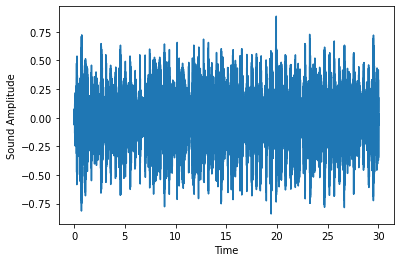

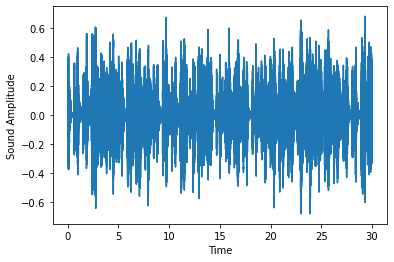

In [38]:
for i in range(2):
    audio, sfreq = librosa.load(filepath+str(i)+".wav")
    time = np.arange(0, len(audio))/sfreq
    plt.plot(time,audio)
    plt.xlabel("Time")
    plt.ylabel("Sound Amplitude")
    plt.show()

In [42]:
import json
import numpy as np
# load data
def load_data(dataset_path):
    with open(dataset_path,"r") as f:
        data = json.load(f)
    
    # Convert list to numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])    
    
    return inputs,targets

# 푸리에 변환

In [43]:
inputs,targets = load_data(r"./data.json")
# splitting the data

In [44]:
from sklearn.model_selection import train_test_split

input_train, input_test, target_train, target_test = train_test_split(inputs, targets, test_size=0.3)
print(input_train.shape, target_train.shape)

(6990, 130, 13) (6990,)


In [45]:
import tensorflow.keras as keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
# Overfitting
model = Sequential()

model.add(Flatten(input_shape=(inputs.shape[1],inputs.shape[2])))
model.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer = keras.regularizers.l2(0.003)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [47]:
from tensorflow.keras import optimizers
adam = optimizers.Adam(lr=1e-4)

In [48]:
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

hist = model.fit(input_train, target_train,
                 validation_data = (input_test,target_test),
                 epochs = 50,
                 batch_size = 32)

Epoch 1/50
219/219 [==============================] - 4s 13ms/step - loss: 31.6028 - accuracy: 0.1293 - val_loss: 5.4623 - val_accuracy: 0.1852
Epoch 2/50
219/219 [==============================] - 3s 13ms/step - loss: 8.4234 - accuracy: 0.1751 - val_loss: 4.9314 - val_accuracy: 0.2330
Epoch 3/50
219/219 [==============================] - 3s 13ms/step - loss: 6.2609 - accuracy: 0.1768 - val_loss: 4.8938 - val_accuracy: 0.2290
Epoch 4/50
219/219 [==============================] - 3s 13ms/step - loss: 5.5890 - accuracy: 0.1780 - val_loss: 4.8288 - val_accuracy: 0.2557
Epoch 5/50
219/219 [==============================] - 3s 14ms/step - loss: 5.2065 - accuracy: 0.2079 - val_loss: 4.7490 - val_accuracy: 0.2674
Epoch 6/50
219/219 [==============================] - 3s 14ms/step - loss: 5.0798 - accuracy: 0.2144 - val_loss: 4.7064 - val_accuracy: 0.2957
Epoch 7/50
219/219 [==============================] - 3s 13ms/step - loss: 4.9427 - accuracy: 0.2302 - val_loss: 4.5990 - val_accuracy: 0.316

In [49]:
clear_output()

In [51]:
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

<Figure size 1440x1080 with 0 Axes>

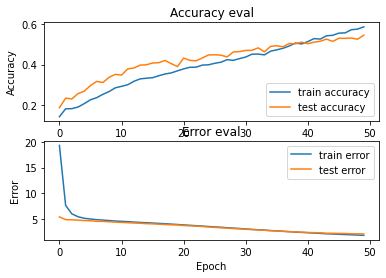

In [52]:
plot_history(hist)

In [53]:
test_error, test_accuracy = model.evaluate(input_test, target_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

94/94 [==============================] - 0s 3ms/step - loss: 2.1602 - accuracy: 0.5461
Test accuracy: 0.5460613965988159


In [54]:
def prepare_dataset(test_size, validation_size):
    X,y = load_data(r"./data.json")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = validation_size)
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_val, X_test, y_train, y_val, y_test
X_train, X_val, X_test, y_train, y_val, y_test = prepare_dataset(0.25, 0.2)
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])
print(input_shape)

(130, 13, 1)


In [55]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = input_shape))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (2, 2), activation = "relu"))
model.add(MaxPool2D((2, 2), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(16, (1, 1), activation = "relu"))
model.add(MaxPool2D((1, 1), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 11, 64)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 6, 64)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 6, 64)         256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 4, 32)         18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 1, 32)        

In [56]:
model.compile(optimizer=adam,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

hist = model.fit(X_train, y_train,
                 validation_data = (X_val, y_val),
                 epochs = 40,
                 batch_size = 32)

Epoch 1/40
188/188 [==============================] - 14s 67ms/step - loss: 2.2630 - accuracy: 0.2349 - val_loss: 1.6881 - val_accuracy: 0.3825
Epoch 2/40
188/188 [==============================] - 13s 69ms/step - loss: 1.6130 - accuracy: 0.4196 - val_loss: 1.4050 - val_accuracy: 0.4960
Epoch 3/40
188/188 [==============================] - 14s 72ms/step - loss: 1.4710 - accuracy: 0.4716 - val_loss: 1.3293 - val_accuracy: 0.5147
Epoch 4/40
188/188 [==============================] - 13s 72ms/step - loss: 1.3763 - accuracy: 0.4954 - val_loss: 1.2847 - val_accuracy: 0.5220
Epoch 5/40
188/188 [==============================] - 13s 68ms/step - loss: 1.3590 - accuracy: 0.5076 - val_loss: 1.2261 - val_accuracy: 0.5527
Epoch 6/40
188/188 [==============================] - 13s 70ms/step - loss: 1.2913 - accuracy: 0.5327 - val_loss: 1.1640 - val_accuracy: 0.5701
Epoch 7/40
188/188 [==============================] - 15s 78ms/step - loss: 1.2391 - accuracy: 0.5577 - val_loss: 1.1290 - val_accuracy:

<Figure size 1440x1080 with 0 Axes>

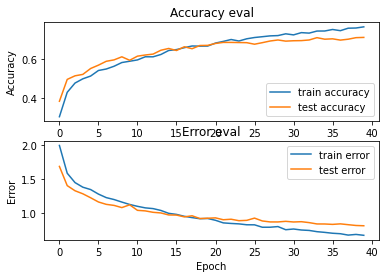

In [57]:
plot_history(hist)

In [58]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

79/79 [==============================] - 1s 15ms/step - loss: 0.8233 - accuracy: 0.7221
Test accuracy: 0.7220664620399475


In [59]:
def predict(model, X, y):
    X = X[np.newaxis,...]
    prediction = model.predict(X)
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Expected index: {y}, Predicted index: {predicted_index}")
predict(model, X_test[10], y_test[10])

Expected index: 4, Predicted index: [4]
